# Feature Transformation
1. Missing Value Imputation (Remove Missing Values | Impute Missing Values)<br>
    - Remove (drop) <br>
    - Impute (CCA: Complete Case Analysis) <br>
        - Univariate Imputation (Use When MCAR: Missing Completely at random ) <br><br>
            a. Numerical <br><br>
                - Mean/median<br>
                - Random (Applicable for both num and cat data)<br>
                - End of Distribution (NMAR: Not missing at Random)<br><br>
            b. Categorical<br><br>
                - Mode<br>
                - Missing indicator (for both num and cat data)<br><br>
        - Multivariate Imputation<br><br>
            - KNN imputer <br>
            - Iterative Imputer <br>
            - MICE (Multivariate Imputation by Chained Equations)<br><br>


https://www.youtube.com/@dataschool

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = sns.load_dataset('penguins')
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Univariate Imputation (Numerical)

In [6]:
df = pd.read_csv("titanic_toy.csv")
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [7]:
df['Age_mean'] = df['Age'].fillna(df['Age'].mean())
df['Age_median'] = df['Age'].fillna(df['Age'].median())

df['Fare_mean'] = df['Fare'].fillna(df['Fare'].mean())
df['Fare_median'] = df['Fare'].fillna(df['Fare'].median())

In [8]:
df.sample(5)

,Age,Fare,Family,Survived,Age_mean,Age_median,Fare_mean,Fare_median
208,16.0,7.750,0,1,16.000000,16.0,7.750,7.750
422,29.0,7.875,0,0,29.000000,29.0,7.875,7.875
350,23.0,9.225,0,0,23.000000,23.0,9.225,9.225
372,19.0,8.050,0,0,19.000000,19.0,8.050,8.050
181,NaN,15.050,0,0,29.699118,28.0,15.050,15.050


<Axes: xlabel='Age_median', ylabel='Fare_median'>

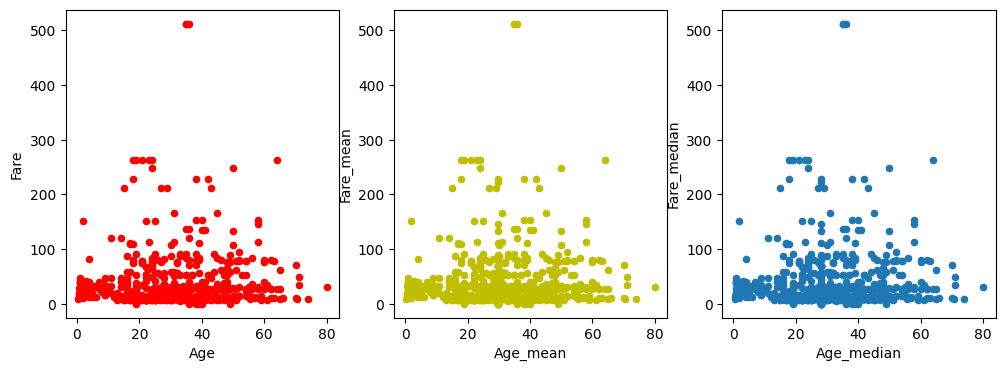

In [9]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

df.plot(x='Age',y='Fare',kind='scatter',ax=ax1,c='r')
df.plot(x='Age_mean',y='Fare_mean',kind='scatter',ax=ax2,c='y')
df.plot(x='Age_median',y='Fare_median',kind='scatter',ax=ax3)

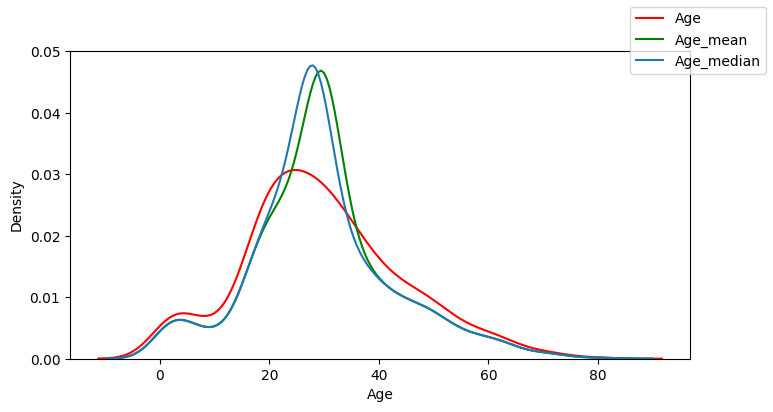

In [10]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,4))

sns.kdeplot(data=df,x='Age',ax=ax1,c='r',label='Age')
sns.kdeplot(data=df,x='Age_mean',ax=ax1,c='g',label='Age_mean')
sns.kdeplot(data=df,x='Age_median',ax=ax1,label='Age_median')
fig.legend()

Text(0.5, 1.0, 'Pandas KDE Plot')

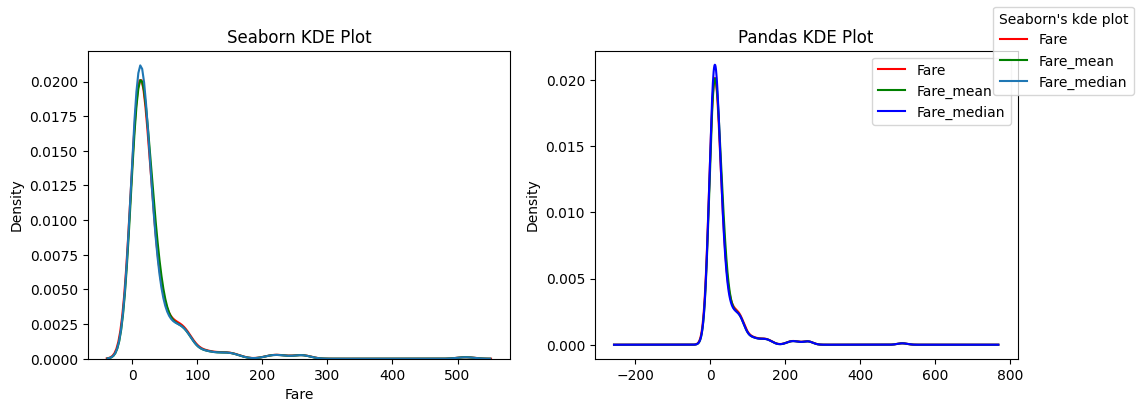

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

# seaborn kde plot
sns.kdeplot(data=df,x='Fare',ax=ax1,c='r',label='Fare')
sns.kdeplot(data=df,x='Fare_mean',ax=ax1,c='g',label='Fare_mean')
sns.kdeplot(data=df,x='Fare_median',ax=ax1,label='Fare_median')
fig.legend(title="Seaborn's kde plot")
ax1.set_title('Seaborn KDE Plot')
# Pandas KDE Plot

df['Fare'].plot(kind='kde',ax=ax2,c='r',label='Fare',legend=True)
df['Fare_mean'].plot(kind='kde',ax=ax2,c='g',label='Fare_mean',legend=True)
df['Fare_median'].plot(kind='kde',ax=ax2,c='b',label='Fare_median',legend=True)
ax2.set_title("Pandas KDE Plot")

<Axes: >

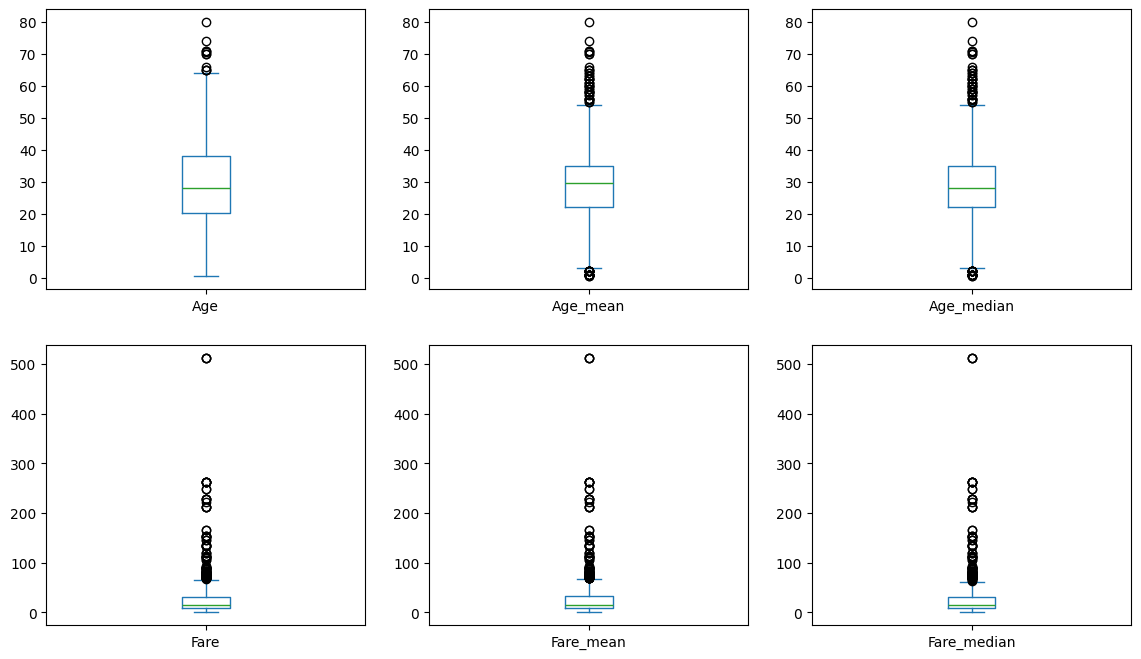

In [12]:
# Box plots to detect the outliers
fig ,axes = plt.subplots(2,3,figsize=(14,8))

df['Age'].plot(kind='box',ax=axes[0][0])
df['Age_mean'].plot(kind='box',ax=axes[0][1])
df['Age_median'].plot(kind='box',ax=axes[0][2])


df['Fare'].plot(kind='box',ax=axes[1][0])
df['Fare_mean'].plot(kind='box',ax=axes[1][1])
df['Fare_median'].plot(kind='box',ax=axes[1][2])



## Using Scikit learn

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['Age','Fare','Family']],df['Survived'])

In [15]:
X_train['Age'].isnull().sum()

138

In [16]:
# Create object with strategy
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

mean_Train = imputer1.fit_transform(X_train)
median_Train = imputer2.fit_transform(X_train)

In [17]:
pd.DataFrame(mean_Train,columns=X_train.columns).isnull().sum()

Age       0
Fare      0
Family    0
dtype: int64

In [18]:
pd.DataFrame(median_Train,columns=X_train.columns).isnull().sum()

Age       0
Fare      0
Family    0
dtype: int64

## Using Transfomers

In [19]:
trf = ColumnTransformer([
    ('trf1',imputer1,['Age']),
    ('trf2',imputer2,['Fare'])
],remainder='passthrough')

trf.fit(X_train)

C:\Users\PMLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('trf1', SimpleImputer(), ['Age']),
                                ('trf2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [20]:
trf.named_transformers_['trf1'].statistics_

array([29.78050943])

# Univariate Imputation (Categorical)


ChatGPT
The ?raw=true parameter at the end of a GitHub URL is often used to obtain the raw content of a file rather than its rendered view on GitHub. This is particularly useful when you want to directly download files, such as CSVs, from GitHub repositories using scripts or commands like curl or directly in Python using libraries like pandas. Here’s how you can achieve what you want using Python with pandas:

In [21]:
# focus on the ?raw=True at the last of url (Suggested) 
# data = pd.read_csv("https://github.com/user/folder/train.csv?raw=true")
data = pd.read_csv("A:\\py-code\\1 ML\\Feature-Engineering\\train.csv")
data = data[['GarageQual','FireplaceQu','SalePrice']]
data

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,TA,Gd,266500
1458,TA,NaN,142125


In [22]:
data.isnull().sum()

GarageQual      81
FireplaceQu    690
SalePrice        0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GarageQual   1379 non-null   object
 1   FireplaceQu  770 non-null    object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


<Axes: xlabel='FireplaceQu', ylabel='count'>

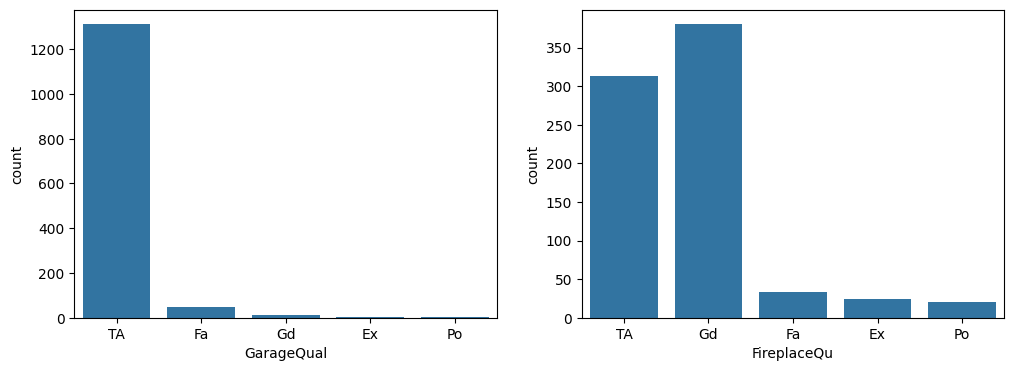

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
# countplot for the categorical data
sns.countplot(data=data, x='GarageQual', ax=ax1)
sns.countplot(data=data, x='FireplaceQu', ax=ax2)


In [25]:
data['GarageQual_mode'] = data['GarageQual'].fillna(data['GarageQual'].mode())
data['FireplaceQu_mode'] = data['FireplaceQu'].fillna(data['FireplaceQu'].mode())

# After filling the nan vlaues with the mode didn't make any changes.

# data['GarageQual_mode'].isnull().sum() #same as original
# data['FireplaceQu_mode'].isnull().sum() #same as original


<Axes: xlabel='FireplaceQu', ylabel='count'>

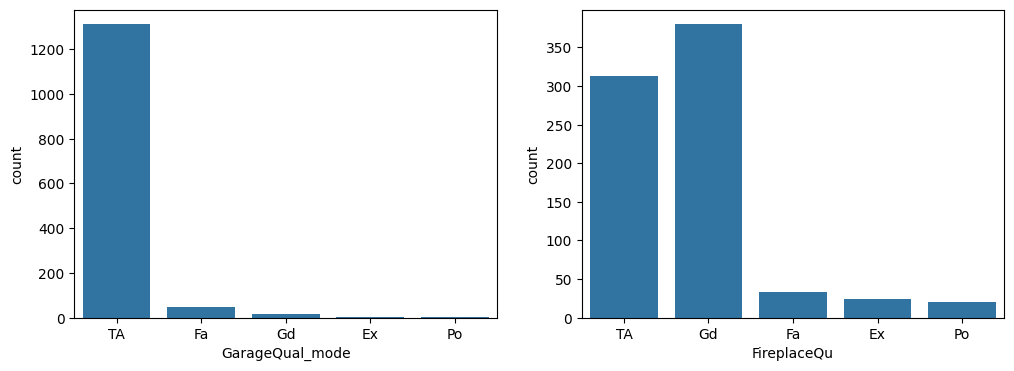

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))

sns.countplot(data=data,x='GarageQual_mode',ax=ax1)
sns.countplot(data=data,x='FireplaceQu',ax=ax2)


## Using Scikit learn 

In [27]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='most_frequent')

impute.fit(data)
data_imputed = impute.transform(data)
data_imputed = pd.DataFrame(data=data_imputed, columns=data.columns)
data_imputed

,GarageQual,FireplaceQu,SalePrice,GarageQual_mode,FireplaceQu_mode
0,TA,Gd,208500,TA,Gd
1,TA,TA,181500,TA,TA
2,TA,TA,223500,TA,TA
3,TA,Gd,140000,TA,Gd
4,TA,TA,250000,TA,TA
...,...,...,...,...,...
1455,TA,TA,175000,TA,TA
1456,TA,TA,210000,TA,TA
1457,TA,Gd,266500,TA,Gd
1458,TA,Gd,142125,TA,Gd


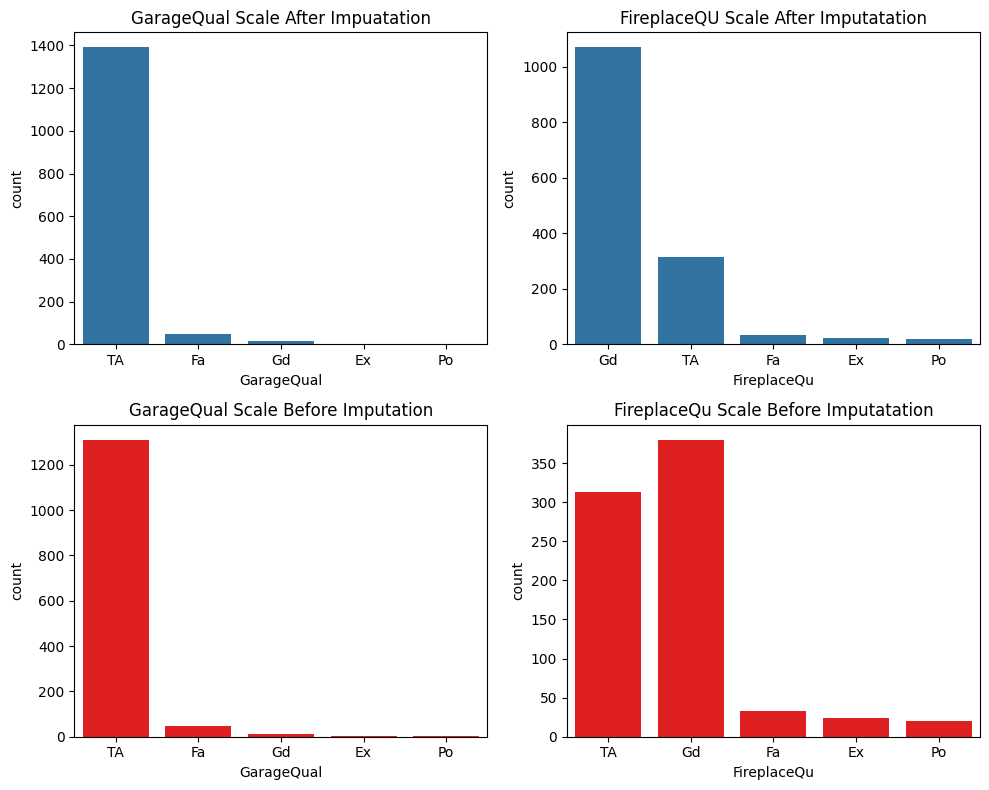

In [28]:
fig, (ax1,ax2) = plt.subplots(2,2,figsize=(10,8))

ax1[0].set_title("GarageQual Scale After Impuatation")
sns.countplot(data=data_imputed,x='GarageQual',ax=ax1[0])

ax1[1].set_title("FireplaceQU Scale After Imputatation")
sns.countplot(data=data_imputed,x='FireplaceQu',ax=ax1[1])


ax2[0].set_title("GarageQual Scale Before Imputation")
sns.countplot(data=data,x='GarageQual',ax=ax2[0],color='r')

ax2[1].set_title("FireplaceQu Scale Before Imputatation")
sns.countplot(data=data,x='FireplaceQu',ax=ax2[1],color='r')

plt.tight_layout() # Must add this line to prevent overlapping of labels

In the above count plots the number of the previous mode variable is increasing this is becuase we are replacing the missing values with the mode (most_frequent) value.

# Univariate Imputation (Random & Missing Indicator)
- Applicable for both numerical and categorical data

## Missing Indicator

In [29]:
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
df = pd.read_csv("titanic_toy.csv")
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'],test_size=0.2, random_state=2)

In [31]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [32]:
X_train.isnull().sum()

Age       148
Fare       36
Family      0
dtype: int64

In [33]:
imputer = SimpleImputer()

X_train_imputed = impute.fit_transform(X_train)
X_test_imputed = impute.transform(X_test)

X_train_imputed = pd.DataFrame(X_train_imputed,columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed,columns=X_test.columns)

In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_imputed,Y_train)
y_pred = clf.predict(X_test_imputed)


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.6145251396648045

## Missing Indicator
- Adding booleans columns in the training set for the correspoding columns that have missing values. The missing indicator columns are boolean type variables where True means the Nan value in the original column and False otherwise. This process increases the performance of model.

In [ ]:
mi = MissingIndicator()
X_train_mi = mi.fit_transform(X_train)
X_test_mi = mi.transform(X_test)

# The missing indicator will output a boolean numpy array. Where True means null otherwise False.

In [ ]:
X_train_mi[:,0].sum()
# 148 is the sum of True. True = 1, and False = 0; 148 missing values are indicated by True.


148

In [ ]:
X_train_imputed.isnull().sum()

Age       0
Fare      0
Family    0
dtype: int64

In [ ]:
X_train_imputed[['Age_Nan_ind','Fare_Nan_ind']] = X_train_mi 
X_test_imputed[['Age_Nan_ind','Fare_Nan_ind']] = X_test_mi 

In [ ]:
X_train_imputed

,Age,Fare,Family,Age_Nan_ind,Fare_Nan_ind
0,40.0,27.7208,0.0,False,False
1,4.0,16.7000,2.0,False,False
2,47.0,9.0000,0.0,False,False
3,9.0,31.3875,6.0,False,False
4,20.0,9.8458,0.0,False,False
...,...,...,...,...,...
707,30.0,8.6625,0.0,False,False
708,24.0,8.7125,0.0,True,False
709,71.0,49.5042,0.0,False,False
710,24.0,221.7792,0.0,True,False


In [ ]:
clf = LogisticRegression()
clf.fit(X_train_imputed,Y_train)
y_pred = clf.predict(X_test_imputed)

In [ ]:
accuracy_score(Y_test,y_pred)

0.6256983240223464

## Decision Region Plot of 2 Features

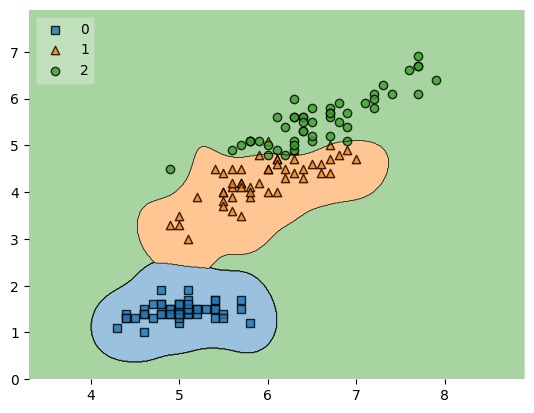

In [73]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(gamma = 10))
))
svm_clf = poly_kernel_svm_clf.fit(X, y)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=svm_clf, legend=2);

## Random Sample Imputation
- Filling the null values by selecting the values from random places of the original column not by filling the random values by generating.

In [ ]:
df = pd.read_csv("titanic_toy.csv")
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [ ]:
df.isnull().sum()

Age            177
Fare            45
Family           0
Survived         0
Age_imputed      0
dtype: int64

In [ ]:
# Create a new column
df['Age_imputed'] = df['Age']

# df['Age_imputed'].isnull().sum() # `177`

# select the Nan indices
df['Age_imputed'][df['Age_imputed'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age_imputed, Length: 177, dtype: float64

In [ ]:
# random state
random_state = df['Age'].isnull().sum() # In this case 177 missing values

# select random_state (177) values from random indices excluding Nan
df['Age'].dropna().sample(random_state) 


675    18.0
750     4.0
184     4.0
192    19.0
373    22.0
       ... 
371    18.0
197    42.0
670    40.0
636    32.0
660    50.0
Name: Age, Length: 177, dtype: float64

In [ ]:
# Assign the 177 random value to the Age_imputed column's Nan values
df['Age_imputed'][df['Age_imputed'].isnull()] = df['Age'].dropna().sample(df['Age'].isnull().sum()).values
  # [Column     ][  index                   ] =  [Select Orignal Column].dropna().sample(177 in this case).values; Value to assign a numpy



# If this prompts an error after executing more than once ---> Run the cell which initializes the Age_imputed Column

C:\Users\PMLS\AppData\Local\Temp\ipykernel_10708\487622203.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Age_imputed'][df['Age_imputed'].isnull()] = df['Age'].dropna().sample(df['Age'].isnull().sum()).values
C:\Users\PMLS\AppData\L

In [ ]:
df['Fare_imputed'] = df['Fare']

df['Fare_imputed'][df['Fare_imputed'].isnull()] = df['Fare'].dropna().sample(df['Fare'].isnull().sum()).values
#   1                   2                            3                               4                   5
#  
# 1. Create a column named col_imputed 
# 2. Get the indices of Nan values to be replaced
# 3. Select the original column excluding Nan values
# 4. Use the DataFrame.sample(num_of_nan_values) method to select the num_of_nan_values (in this case 177) randomly selected values
# 5. get the values in the numpy array form and assign the ndarray to the col_imputed column
# 
# 

C:\Users\PMLS\AppData\Local\Temp\ipykernel_10708\529491067.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Fare_imputed'][df['Fare_imputed'].isnull()] = df['Fare'].dropna().sample(df['Fare'].isnull().sum()).values
C:\Users\PMLS\AppDa

In [ ]:
df[['Age','Age_imputed','Fare','Fare_imputed']].isnull().sum()

Age             177
Age_imputed       0
Fare             45
Fare_imputed      0
dtype: int64

<Axes: >

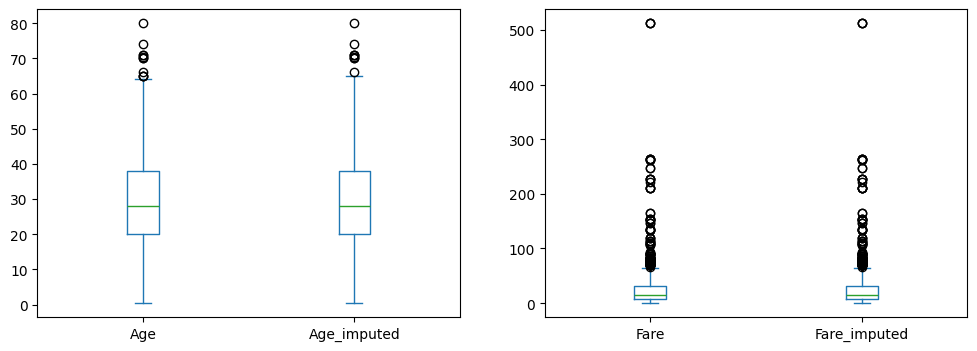

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
df[['Age','Age_imputed']].plot(kind='box',ax=ax1)
df[['Fare','Fare_imputed']].plot(kind='box',ax=ax2)

# Multivariate Imputation
- KNN

In [39]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd


In [2]:
df = pd.read_csv("titanic_toy.csv")
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [3]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'],test_size=0.25, random_state=2)

In [40]:
si = SimpleImputer()
knn = KNNImputer(n_neighbors=8,weights='distance')

X_train_si = si.fit_transform(X_train)
X_test_si = si.transform(X_test)

X_train_knn = knn.fit_transform(X_train)
X_test_knn = knn.transform(X_test)


In [33]:
lr_si = LogisticRegression()
lr_knn = LogisticRegression()

lr_si.fit(X_train_si,Y_train)
lr_knn.fit(X_train_knn,Y_train)

y_pred_si = lr_si.predict(X_test_si)
y_pred_knn = lr_knn.predict(X_test_knn) 


In [41]:
print("Simple Imputer: ",accuracy_score(Y_test,y_pred_si))
print("KNNImputer: ",accuracy_score(Y_test,y_pred_knn))

Simple Imputer:  0.6547085201793722
KNNImputer:  0.6502242152466368


In [48]:
print("cross_val_score Simple Imputer: ",cross_val_score(LogisticRegression(),X_train_si,Y_train,scoring='accuracy',cv=10).mean())
print("cross_val_score KNN Imputer: ",cross_val_score(LogisticRegression(),X_train_knn,Y_train,scoring='accuracy',cv=10).mean())

cross_val_score Simple Imputer:  0.6872229760289461
cross_val_score KNN Imputer:  0.685685210312076
